In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggfittext’ was built under R version 4.3.2”


In [2]:
dir_fig = 'R_trans/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))
df_main

[1] 918557    418


CHROM,POS,END,ID,GENCODE,PERIOD,ZS_SAMPLES,ZS_SAMPLES_NUM,SN_GB,DENOVO,⋯,X_DEV_BR_GENE_40_cds,X_DEV_BR_GENE_40_utr,X_DEV_BR_GENE_40_intron,X_DEV_BR_GENE_50_cds,X_DEV_BR_GENE_50_utr,X_DEV_BR_GENE_50_intron,X_PLIp9_DEV_BR_GENE_10,X_PLIp9_DEV_BR_GENE_10_cds,X_PLIp9_DEV_BR_GENE_10_utr,X_PLIp9_DEV_BR_GENE_10_intron
<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1,9971,11027,chr1_9970_11027,.,6,.,.,0,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,11196,11478,chr1_11195_11478,.,61,"REACH000001:-4.96|0.22:-40|0:-40|1x0|8,REACH000402:-3.15|0.22:-26|0:-26|1x0|8,REACH000409:-3.41|0.22:-28|0:-28|1x0|6,REACH000411:0.22|3.86:0|28:0|3x28|1,REACH000418:-4.96|0.22:-40|0:-40|1x0|6,REACH000480:-3.80|-0.68:-31|-7:-31|1x-7|2,REACH000502:-4.57|0.10:-37|-1:-37|1x-1|6,REACH000510:-4.31|0.22:-35|0:-35|1x0|7,REACH000529:-5.74|-5.35:-46|-43:-46|1x-43|2,REACH000531_ONT:-1.46|4.38:-13|32:-13|5x32|1,REACH000558:-3.02|-0.81:-25|-8:-25|1x-8|2,REACH000564:-5.48|0.10:-44|-1:-44|1x-1|7,REACH000682:-3.02|0.22:-25|0:-25|1x0|4",13,221,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,15768,15879,chr1_15767_15879,exon,6,"REACH000099:0.09|3.30:0|5:0|6x5|1,REACH000380:-9.54|0.09:-15|0:-15|1x0|5,REACH000423:0.09|5.23:0|8:0|3x8|1,REACH000426:0.09|-7.61:0|-12:-12|1x0|4,REACH000479:-3.12|0.09:-5|0:-5|3x0|29,REACH000480:-7.61|0.09:-12|0:-12|1x0|13,REACH000513:0.09|-3.12:0|-5:-5|1x0|5,REACH000523:-7.61|0.09:-12|0:-12|3x0|12,REACH000546:-5.69|0.09:-9|0:-9|1x0|7,REACH000557:-4.40|0.09:-7|0:-7|1x0|6,REACH000563:-7.61|0.09:-12|0:-12|5x0|16",11,250,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,16683,16774,chr1_16682_16774,exon,3,"REACH000183:-0.02|4.37:0|9:0|6x9|2,REACH000185:0.46|4.37:1|9:1|2x9|2,REACH000291:-0.02|4.37:0|9:0|7x9|2,REACH000365:-0.02|4.37:0|9:0|23x9|2,REACH000525:4.37|4.37:9|9:9|1,REACH000538:-0.02|4.37:0|9:0|3x9|2,REACH000650:-0.02|4.37:0|9:0|6x9|2,REACH000671:-0.02|4.37:0|9:0|33x9|2,REACH000673:-0.02|4.37:0|9:0|24x9|4,REACH000703:4.37|4.37:9|9:9|1,REACH000727:-0.02|4.37:0|9:0|27x9|2,REACH000730:-0.02|4.37:0|9:0|3x9|1,REACH000414:-0.51|4.37:-1|9:-1|7x9|1,REACH000426:-3.44|-0.51:-7|-1:-7|1x-1|4,REACH000541:-1.49|6.81:-3|14:-3|6x14|1,REACH000557:-6.38|-0.51:-13|-1:-13|1x-1|6,REACH000604:-3.44|-0.51:-7|-1:-7|4x-1|15",17,255,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,19276,19473,chr1_19275_19473,.,70,"REACH000155:0.21|-5.81:0|-58:-58|2x0|13,REACH000156:-5.81|0.11:-58|-1:-58|1x-1|12,REACH000400:-5.81|0.11:-58|-1:-58|2x-1|17,REACH000403:0.21|-5.81:0|-58:-58|2x0|18,REACH000409:0.21|-5.81:0|-58:-58|3x0|19,REACH000412:0.21|-5.81:0|-58:-58|3x0|20,REACH000426:0.21|-5.81:0|-58:-58|2x0|8,REACH000510:0.21|-5.81:0|-58:-58|2x0|12,REACH000512:0.21|-5.81:0|-58:-58|1x0|12,REACH000540:0.21|-5.81:0|-58:-58|2x0|12,REACH000544:-5.81|0.11:-58|-1:-58|2x-1|9,REACH000562:0.21|-5.81:0|-58:-58|4x0|26,REACH000564:0.21|-5.81:0|-58:-58|3x0|25,REACH000604:0.21|-5.81:0|-58:-58|2x0|19",14,258,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,20799,20893,chr1_20798_20893,.,18,.,.,257,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,29715,29822,chr1_29714_29822,exon,6,"REACH000001:-4.48|0.17:-120|-2:-120|5x-2|3,REACH000154:-4.48|0.25:-120|0:-120|4x0|1,REACH000226:-4.48|0.25:-120|0:-120|13x0|14,REACH000349:-4.48|0.25:-120|0:-120|3x0|6,REACH000400:0.25|-4.48:0|-120:-120|2x0|10,REACH000411:-4.48|0.21:-120|-1:-120|4x-1|1,REACH000421:-4.48|0.29:-120|1:-120|3x1|4,REACH000422:-4.48|0.21:-120|-1:-120|2x-1|10,REACH000427:0.25|-4.48:0|-120:-120|2x0|13,REACH000435:-4.48|0.33:-120|2:-120|4x2|1,REACH000476:0.25|-4.48:0|-120:-120|3x0|5,REACH000480:-4.48|0.21:-120|-1:-120|4x-1|8,REACH000503:-4.48|0.21:-120|-1:-120|3x-1|3,REACH000510:-4.48|0.21:-120|-1:-120|4x-1|9,REACH000524:0.25|-4.48:0|-120:-120|2x0|6,REACH000531_ONT:0.25|-4.48:0|-120:-120|3x0|7,REACH000559:-4.48|0.68:-120|11:-120|4x11|2,REACH000564:-4.48|0.13:-120|-3:-120|6x-3|1,REACH000579:0.25|-4.48:0|-120:-120|6x0|8,REACH000581:-4.48|0.29:-120|1:-120|5x1|7,REACH000662:0.25|-4.48:0|-120:-120|1x0|3,REACH000663:-4.48|0.17:-120|-2:-120|4x-2|5",22,238,.,⋯,0,0,0,0,0,0,0,0,0,0
chr1,30825,30989,c

In [4]:
# filter df
df_flt = df_main

In [5]:
this_zs_thr = 7
### All features
#fts = c('LOF_FDR_ASD_cds', 'LOF_FDR_DD_cds', 'LOF_FDR_NDD_cds', 
#        'LOF_DEV_BR_10_cds', 'PLIp9_LOF_DEV_BR_10_cds', 
#        'LOF_PLIp9_cds', 'LOF_LOWPLI_cds',
#        'FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
#        'DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_cds', 
#        'PLIp9_cds', 'LOWPLI_cds',
#        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
#        'DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_utr',
#        'PLIp9_utr', 'LOWPLI_utr',
#        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
#        'DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_intron',
#        'PLIp9_intron', 'LOWPLI_intron',
#        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#fts_labels = c('LOF ASD FDR, CDS', 'LOF DD FDR, CDS', 'LOF NDD FDR, CDS', 
#               'LOF dev. brain genes, CDS', 'LOF dev. brain pLI≥.9 genes, CDS', 
#               'LOF pLI≥.9, CDS', 'LOF pLI≤.9, CDS',
#               'ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
#               'dev. brain genes, CDS', 'dev. brain pLI≥.9 genes, CDS', 
#               'pLI≥.9, CDS', 'pLI≤.9, CDS',
#               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
#               'dev. brain genes, UTR', 'dev. brain pLI≥.9 genes, UTR',
#               'pLI≥.9, UTR', 'pLI≤.9, UTR',
#               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
#               'dev. brain genes, intron', 'dev. brain pLI≥.9 genes, intron',
#               'pLI≥.9, intron', 'pLI≤.9, intron', 
#               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

### Clean features
#'PLIp9_LOF_DEV_BR_10_cds',
#'LOF_DEV_BR_10_cds',
#'LOF_PLIp9_cds', 
#'LOF_LOWPLI_cds',
fts = c(
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#'LOF dev. brain pLI≥.9 genes, CDS', 
#'LOF dev. brain genes, CDS', 
#'LOF pLI≥.9, CDS', 
#'LOF pLI≤.9, CDS',
fts_labels = c(
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

print_stuff = F

ORs = c()
pvals = c()
tr_cases = c()
ntr_cases = c()
tr_cons = c()
ntr_cons = c()
pval.bin.cases = c()
pval.bin.controls = c()
lb.bin.cases = c()
lb.bin.controls = c()
ub.bin.cases = c()
ub.bin.controls = c()
tr.rate.cases = c()
tr.rate.controls = c()
#for (ft in fts[c(11:11)]) {
for (ft in fts) {
    var = paste('X_', ft, sep="")
    print(var)

    df_w = df_flt[df_flt[paste('X_', ft, sep="")] == 1,]
    #print(dim(df_w))
    #print('SVs intersecting:', ft, dim(df_w))

    tran_case = sum(df_w[paste('NUM_tran_case_ZS_SAMPLES_gt', this_zs_thr, '_len25', '_PB',  sep="")])
    tran_control = sum(df_w[paste('NUM_tran_control_ZS_SAMPLES_gt', this_zs_thr, '_len25', '_PB', sep="")])
    nontran_case = sum(df_w[paste('NUM_nontran_case_ZS_SAMPLES_gt', this_zs_thr, '_len25', '_PB', sep="")])
    nontran_control = sum(df_w[paste('NUM_nontran_control_ZS_SAMPLES_gt', this_zs_thr, '_len25', '_PB', sep="")])
    if (print_stuff) {
        cat('tran_case:', tran_case, '\n')
        cat('tran_control:', tran_control, '\n')
        cat('nontran_case:', nontran_case, '\n')
        cat('nontran_control:', nontran_control, '\n')
    }

    tr_cases = c(tr_cases, tran_case)
    ntr_cases = c(ntr_cases, nontran_case)
    tr_cons = c(tr_cons, tran_control)
    ntr_cons = c(ntr_cons, nontran_control)
        
    OR = (tran_case / tran_control) / (nontran_case / nontran_control)
    ORs = c(ORs, OR)
    ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
    rownames(ctable) <- c("Case", "Control")
    colnames(ctable) <- c("Tran", "non-Tran")

    chi_sq_test <- chisq.test(ctable)
    pval = chi_sq_test$p.value
    pvals = c(pvals, pval)
    if (print_stuff) {
        print(ctable)
        print(chi_sq_test)
        #print(str(chi_sq_test))
        print('pval:')
        print(pval)
    }

    p = .5
    if (tran_case+nontran_case > 0) {
        #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
        binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
        pval.bin.case = binom.result.case$p.value
        lb.bin.case = binom.result.case$conf.int[1]
        ub.bin.case = binom.result.case$conf.int[2]
        tr.rate.case = unname(binom.result.case$estimate)[1]
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    else {
        binom.result.case <- NULL
        pval.bin.case = NaN
        lb.bin.case = NaN
        ub.bin.case = NaN
        tr.rate.case = NaN
        pval.bin.cases = c(pval.bin.cases, pval.bin.case)
        lb.bin.cases = c(lb.bin.cases, lb.bin.case)
        ub.bin.cases = c(ub.bin.cases, ub.bin.case)
        tr.rate.cases = c(tr.rate.cases, tr.rate.case)
    }
    if (tran_control+nontran_control > 0) {
        #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
        binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
        pval.bin.control = binom.result.control$p.value
        lb.bin.control = binom.result.control$conf.int[1]
        ub.bin.control = binom.result.control$conf.int[2]
        tr.rate.control = unname(binom.result.control$estimate)[1]
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }
    else {
        binom.result.control <- NULL
        pval.bin.control = NaN
        lb.bin.control = NaN
        ub.bin.control = NaN
        tr.rate.control = NaN
        pval.bin.controls = c(pval.bin.controls, pval.bin.control)
        lb.bin.controls = c(lb.bin.controls, lb.bin.control)
        ub.bin.controls = c(ub.bin.controls, ub.bin.control)
        tr.rate.controls = c(tr.rate.controls, tr.rate.control)
    }

    if (print_stuff) {
        print(binom.result.case)
        print(binom.result.control)
        print('pval.bin.case:')
        print(pval.bin.case)
        print('pval.bin.control:')
        print(pval.bin.control)
        print('lb.bin.case:')
        print(lb.bin.case)
        print('ub.bin.case:')
        print(ub.bin.case)
        print('lb.bin.control:')
        print(lb.bin.control)
        print('ub.bin.control:')
        print(ub.bin.control)
        print('tr.rate.case:')
        print(tr.rate.case)
        print('tr.rate.control:')
        print(tr.rate.control)
        print(str(binom.result.case))
        print(str(binom.result.control))
    }
}

tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')

print('ORs:')
print(ORs)
print('pvals:')
print(pvals)
print('tr_case_ntr_case:')
print(tr_case_ntr_case)
print('tr_con_ntr_con:')
print(tr_con_ntr_con)
print('pval.bin.cases:')
print(pval.bin.cases)
print('pval.bin.controls:')
print(pval.bin.controls)
print('lb.bin.cases:')
print(lb.bin.cases)
print('lb.bin.controls:')
print(lb.bin.controls)
print('ub.bin.cases:')
print(ub.bin.cases)
print('ub.bin.controls:')
print(ub.bin.controls)
print('tr.rate.cases:')
print(tr.rate.cases)
print('tr.rate.controls:')
print(tr.rate.controls)

[1] "X_PLIp9_DEV_BR_GENE_10_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_DEV_BR_GENE_10_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_PLIp9_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_LOWPLI_cds"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_PLIp9_DEV_BR_GENE_10_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_DEV_BR_GENE_10_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_PLIp9_utr"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_LOWPLI_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_FB_PR"
[1] "X_FB_ENH"
[1] "X_GNOCCHI_4"


Warning message in chisq.test(ctable):
“Chi-squared approximation may be incorrect”


[1] "X_GNOCCHI_3"
[1] "X_GNOCCHI_2"
[1] "ORs:"
 [1]       Inf       Inf 2.0000000 0.5818182       Inf 1.0000000 4.5000000
 [8] 2.1000000 0.2222222 1.3023256 0.4481481 0.9670571 1.2857143 1.5085066
[15] 0.4666667 1.4545455 1.2352941
[1] "pvals:"
 [1] 1.000000000 1.000000000 1.000000000 0.794247403 1.000000000 1.000000000
 [7] 0.707660467 0.668524139 0.001789149 0.477409685 0.004620725 0.776530448
[13] 0.970225517 0.408491187 0.500747330 0.586049852 0.584081783
[1] "tr_case_ntr_case:"
 [1] "2/1"     "2/2"     "2/1"     "4/11"    "2/0"     "2/1"     "3/1"    
 [8] "7/5"     "18/33"   "56/43"   "66/81"   "597/519" "10/7"    "38/23"  
[15] "6/15"    "26/26"   "63/54"  
[1] "tr_con_ntr_con:"
 [1] "0/1"     "0/1"     "1/1"     "5/8"     "2/1"     "2/1"     "2/3"    
 [8] "4/6"     "27/11"   "38/38"   "60/33"   "339/285" "10/9"    "23/21"  
[15] "6/7"     "11/16"   "34/36"  
[1] "pval.bin.cases:"
 [1] 1.00000000 1.00000000 1.00000000 0.11846924 0.50000000 1.00000000
 [7] 0.62500000 0.77441406 

In [6]:
# make binomial test dataframe
my_data2 = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                      'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                      'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                      'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                      'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                      'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)

my_data2.melt = melt(my_data2, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                           'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                           'tr_case_ntr_case', 'tr_con_ntr_con'), 
                     variable.name = 'case_control', value.name = 'TR_rate')

my_data2.melt <- transform(my_data2.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
my_data2.melt <- transform(my_data2.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
my_data2.melt <- transform(my_data2.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))

get_pval_char <- function(pval) {
    if (is.na(pval)) {return('')}
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
sig.cases <- sapply(my_data2.melt$pval.bin.cases, get_pval_char)
sig.controls <- sapply(my_data2.melt$pval.bin.controls, get_pval_char)
print(sig.cases)
print(sig.controls)
my_data2.melt$sig.cases = sig.cases
my_data2.melt$sig.controls = sig.controls
my_data2.melt <- transform(my_data2.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))
(my_data2.melt)

 [1] ""  ""  ""  ""  ""  ""  ""  ""  "*" ""  ""  "*" ""  ""  ""  ""  ""  ""  "" 
[20] ""  ""  ""  ""  ""  ""  "*" ""  ""  "*" ""  ""  ""  ""  "" 
 [1] ""   ""   ""   ""   ""   ""   ""   ""   "*"  ""   "**" "*"  ""   ""   ""  
[16] ""   ""   ""   ""   ""   ""   ""   ""   ""   ""   "*"  ""   "**" "*"  ""  
[31] ""   ""   ""   ""  


fts,fts_labels,lb.bin.cases,ub.bin.cases,lb.bin.controls,ub.bin.controls,pval.bin.cases,pval.bin.controls,tr_case_ntr_case,tr_con_ntr_con,case_control,TR_rate,lb.bin,ub.bin,tr_ntr,sig.cases,sig.controls,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
PLIp9_DEV_BR_GENE_10_cds,"dev. brain pLI≥.9 genes, CDS",0.09429932,0.9915962,0.00000000,0.9750000,1.00000000,1.000000000,2/1,0/1,tr.rate.cases,0.6666667,0.09429932,0.9915962,2/1,,,
DEV_BR_GENE_10_cds,"dev. brain genes, CDS",0.06758599,0.9324140,0.00000000,0.9750000,1.00000000,1.000000000,2/2,0/1,tr.rate.cases,0.5000000,0.06758599,0.9324140,2/2,,,
PLIp9_cds,"pLI≥.9, CDS",0.09429932,0.9915962,0.01257912,0.9874209,1.00000000,1.000000000,2/1,1/1,tr.rate.cases,0.6666667,0.09429932,0.9915962,2/1,,,
LOWPLI_cds,"pLI≤.9, CDS",0.07787155,0.5510032,0.13857934,0.6842224,0.11846924,0.581054687,4/11,5/8,tr.rate.cases,0.2666667,0.07787155,0.5510032,4/11,,,
PLIp9_DEV_BR_GENE_10_utr,"dev. brain pLI≥.9 genes, UTR",0.15811388,1.0000000,0.09429932,0.9915962,0.50000000,1.000000000,2/0,2/1,tr.rate.cases,1.0000000,0.15811388,1.0000000,2/0,,,
DEV_BR_GENE_10_utr,"dev. brain genes, UTR",0.09429932,0.9915962,0.09429932,0.9915962,1.00000000,1.000000000,2/1,2/1,tr.rate.cases,0.6666667,0.09429932,0.9915962,2/1,,,
PLIp9_utr,"pLI≥.9, UTR",0.19412045,0.9936905,0.05274495,0.8533672,0.62500000,1.000000000,3/1,2/3,tr.rate.cases,0.7500000,0.19412045,0.9936905,3/1,,,
LOWPLI_utr,"pLI≤.9, UTR",0.27666969,0.8483478,0.12155226,0.7376219,0.77441406,0.753906250,7/5,4/6,tr.rate.cases,0.5833333,0.27666969,0.8483478,7/5,,,
PLIp9_DEV_BR_GENE_10_intron,"dev. brain pLI≥.9 genes, intron",0.22430620,0.4993180,0.54096793,0.8457537,0.04887389,0.013852965,18/33,27/11,tr.rate.cases,0.3529412,0.22430620,0.4993180,18/33,*,*,*


[1] "R_trans/transmission_binomial_test_ZS7_PB_clean.png"


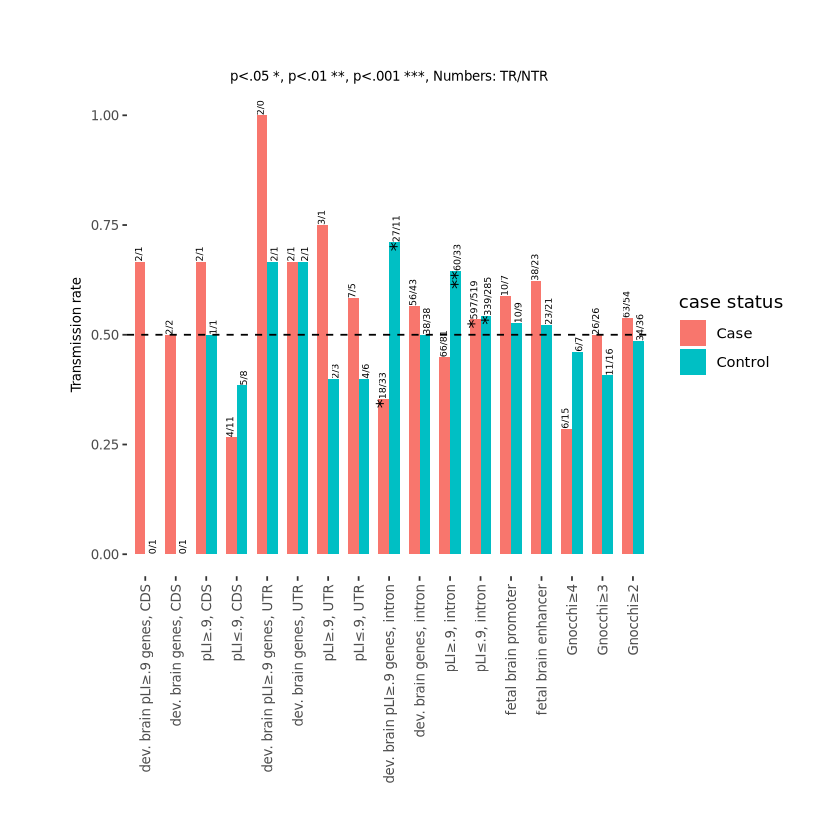

In [7]:
# plot binomial test results
fig_name1 = ''#paste(dir_fig, "transmission_chisq_test_all_", flt_name, "_", par_qual, "_freq", flt_freq, "_clean", ".png", sep='')
fig_name2 = paste(dir_fig, "transmission_binomial_test_ZS", this_zs_thr, "_PB_clean", ".png", sep='')
print(fig_name2)
#y_sig = .05
#y_sig = 0.75
#y_sig = 0.3
y_sig = 3.5
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.5
label_pos2 = 2.6

#, label = sum_case_con)
#  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
# , title = "Numbers up: #Tr./#non-Tr. controls, down:  #Tr./#non-Tr. cases"
# label=my_data2.melt$sig,

ggplot(my_data2.melt, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
  geom_bar(position = position_dodge(), stat = "identity", width = 0.7) +
  #geom_errorbar(position = position_dodge(width = 0.9), colour = "black") +
  geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
  # from `ggfittext`
  #geom_bar_text(position = "dodge", aes(label = TR_rate), place = "top", grow = TRUE, 
  #              reflow = TRUE, min.size = 5, contrast = TRUE) +
  geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
  geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
  labs(y = "Transmission rate", title = "p<.05 *, p<.01 **, p<.001 ***, Numbers: TR/NTR") +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(limits=fts, labels=fts_labels) +
  scale_fill_discrete(name = 'case status', labels = c("Case", "Control"))
  #scale_x_discrete(labels=my_data2.melt$fts_labels) 
  #+
  #annotate("text", x=1:dim(my_data2.melt)[1], y=y_sig, label= sig, size=size_sig) +
  #geom_text(aes(x = fts, y = label_pos, label = tr_case_ntr_case), angle=90, hjust=0, size=2) +
  #geom_text(aes(x = fts, y = label_pos2, label = tr_con_ntr_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)
#, vjust=0, hjust=2

ggsave(fig_name2, width = 10, height = 6)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +